In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [36]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [37]:
df_iris['target'] = iris.target

In [38]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
X=df_iris.drop(["target"],axis=1)
y=df_iris["target"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [98]:
dt_iris = DecisionTreeClassifier(random_state=42)
dt_iris = dt_iris.fit(X_train, y_train)

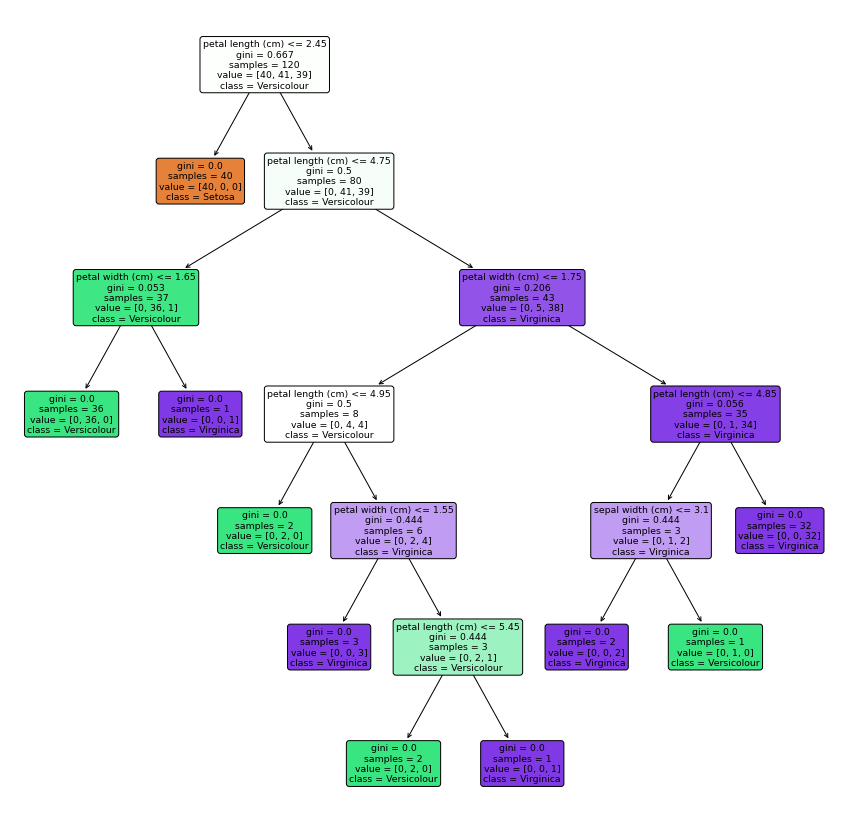

In [99]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dt_iris,
          filled=True,
          rounded=True,
          class_names=["Setosa", "Versicolour", "Virginica"],
         feature_names=iris.feature_names)
plt.show()

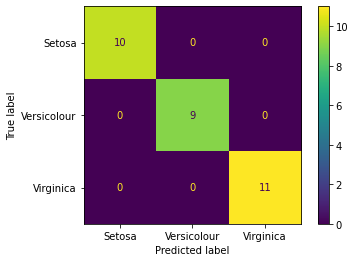

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_iris, X_test, y_test, display_labels=["Setosa", "Versicolour", "Virginica"])

In [101]:
predictions = dt_iris.predict(X_test)

In [102]:
(y_test==predictions).sum()/len(y_test)

1.0

In [84]:
acc = []
depth = [d+1 for d in range(8)]
for d in depth:
    dt_iris = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_iris = dt_iris.fit(X_train, y_train)
    predictions = dt_iris.predict(X_test)
    acc.append(round((y_test==predictions).sum()/len(y_test),2)*100)

Text(0, 0.5, 'accuracy')

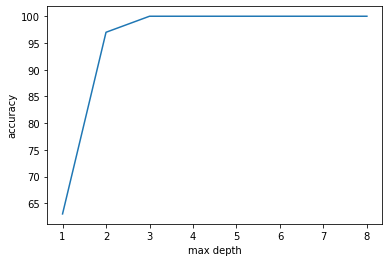

In [90]:
plt.plot(depth,acc)
plt.xlabel('max depth')
plt.ylabel('accuracy')
